### LIFECYCLE OF DATA SCIENCE PROJECT

1.Data collection strategy ---- from various sources like company side, 3rd parties API, Surveys etc.<br>
2.Feature Engineering ---- Handling Missing Values<br>

Why the data is missing?<br>
-Hestitate to give<br>
-Survey information are not valid<br>
-Men-Salary<br>
-Women-Age<br>

These kind of Situation.<br>

Data Should be collected from multiple sources

Data that will be missing at,
- Continous data
- Categorical data

Different Types of Data Missing

###### 1.Missing Completely at Random (MCAR):

    Missing Completely at Random (MCAR) means that when some data is missing from a dataset, it happens entirely by chance or randomly. In other words, there's no specific reason or pattern behind why certain data points are missing. It's as if the missing data points were selected randomly and have nothing to do with the values of other data points in the dataset. This is considered an ideal situation for data analysis because it doesn't introduce any systematic bias or distortion into the results.
    
    If the probability of being missing is the same for all the observations.When the data is MCAR there is absolutely no relationship between the data missing and any other values.

In [65]:
#import titanic dataset from kaggle 

import pandas as pd

df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv')

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
null_count = df.isnull()

In [68]:
null_count.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age and Cabin are the more number of missing values,because this dataset is collected after the accident.So,some information were lost.

The Age and Cabin are no relationship.So,it is not MCAR.It is another type.

In [69]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### 2.Missing Data Not At Random(MNAR) :  Systematic missing values

   There is absolutely some relationship between the data missing and any other values,Observed or missing,within the dataset.
   

In [70]:
# to find out how much percentage of missing or null value present in the dataset
# Some EDA is used to find percentage

import numpy as np

df['Cabin_Null'] = np.where(df['Cabin'].isnull(),1,0)

df['Cabin_Null'].mean()

0.7710437710437711

77 percentage of Cabin missing values are present in the dataset

In [71]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [72]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Null'],
      dtype='object')

The Survived feature and Cabin feature are some relationship because if the person is survived,the person is to live and the person knows the cabin name that person also survived.So,both the feature have some much of information carried.This is known as MNAR.

In [73]:
df.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

The above one shows the how much information percentage are available in both Survived and not survived

0 - Survey
1 - Not Survey

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


###### Missing at Random (MAR):

    In MAR, the probability of a data point being missing depends on observed information but not on the unobserved (missing)    data.
    In other words, the missingness may be related to other variables in the dataset, but as long as those variables are     included in the analysis, the missing data problem can be handled without introducing substantial bias.
    Handling MAR data may involve using techniques like multiple imputation or weighted regression.
    
    MEN - Hide their Salary
    WOMEN - Hide their Age
    
    these type of data is known as MAR.

In [75]:
###### ALL THE TECHNIQUES OF HANDLING MISSING VALUES FOR BOTH CONTINUOUS AND CATOGERICAL
'''
1.Mean/Median/Mode Replacement.
2.Random Sample Imputation.
3.Capturing NAN values with a new feature
4.End of Distribution Imputation.
5.Arbitrary Imputation.
6.Frequent Categories Imputation.

'''

'\n1.Mean/Median/Mode Replacement.\n2.Random Sample Imputation.\n3.Capturing NAN values with a new feature,\n4.End of Distribution Imputation.\n5.Arbitrary Imputation.\n6.Frequent Categories Imputation.\n\n'

###### 1.Mean/Median/Mode Replacement.

 When should we apply? Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
 We solve this by replacing the NAN with the most frequent occurence of the variables.
 
 To prevent outlier we use the Median or mode based on the datasets.

In [76]:
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols=['Age','Fare','Survived'])

In [77]:
df.head() #Taking three columns for our need

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [78]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [79]:
# to find out the percentage of missing of each feature
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [80]:
# feature'Age' has 19% of missing values
# Create the impute function

def impute_age_nan(df,variable,median):
    df[variable+"_Median"] = df[variable].fillna(median)

In [81]:
# to calclate Median
median = df.Age.median()
median

28.0

In [82]:
median = df['Age'].median()
median

28.0

In [ ]:
# Calling the function
impute_age_nan(df,'Age',median)
df.head()

In [85]:
# to calculate the std to know how much data spread from both feature

print(df['Age'].std())
print(df['Age_Median'].std())

14.526497332334044
13.019696550973194


There is a few difference between the two feature.so this is not affected in the dataset.

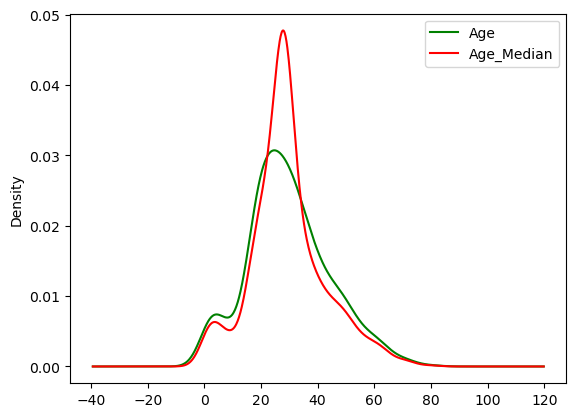

In [90]:
# Visualize the both features

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind = 'kde', ax=ax,color = 'green')
df['Age_Median'].plot(kind ='kde',ax = ax,color = 'red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')


### Advantages and Disadvantages of Mean/Median Imputation

##### Advantages

1.Easy to Implement(Robust to Outliers) <br>
2.Faster way to obtain the complete dataset

##### Disadvantages
1.Changes or Distortion in the original Varience(std)<br>
2.Impacts Correlation